In [7]:
import pandas as pd

df = pd.read_csv("../MachineLearningRating_v3.txt", sep='|')


C:\Users\fikre\AppData\Local\Temp\ipykernel_23676\1456384532.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../MachineLearningRating_v3.txt", sep='|')


In [8]:
print(df.shape)

(1000098, 52)


In [9]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [10]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
df.isna().sum().sort_values(ascending=False)


NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
make                            552
mmcode                          552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
VehicleIntroDate                552
cubiccapacity                   552
CapitalOutstanding                2
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

In [12]:
# Drop columns with >90% missing
drop_cols = ['NumberOfVehiclesInFleet', 'CrossBorder']
df.drop(columns=drop_cols, inplace=True)

# Fill binary flags with 'Unknown' or False
binary_flags = ['Rebuilt', 'Converted', 'WrittenOff', 'NewVehicle']
for col in binary_flags:
    df[col] = df[col].fillna('Unknown')

# Fill categorical columns with 'Unknown'
categorical_cols = ['Gender', 'MaritalStatus', 'Bank', 'AccountType', 'make', 'Model', 'bodytype']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Fill numerical columns with median
num_cols = ['CustomValueEstimate', 'Cylinders', 'kilowatts', 'cubiccapacity', 'NumberOfDoors']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [13]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
df[numerical_cols].describe()


,TotalPremium,TotalClaims,SumInsured,CustomValueEstimate
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05,2.212193e+05
std,2.302845e+02,2.384075e+03,1.508332e+06,2.650521e+05
min,-7.825768e+02,-1.200241e+04,1.000000e-02,2.000000e+04
25%,0.000000e+00,0.000000e+00,5.000000e+03,2.200000e+05
50%,2.178333e+00,0.000000e+00,7.500000e+03,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.500000e+05,2.200000e+05
max,6.528260e+04,3.930921e+05,1.263620e+07,2.655000e+07


In [14]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['Gender'] = df['Gender'].astype('category')
df['Province'] = df['Province'].astype('category')
df['VehicleType'] = df['VehicleType'].astype('category')


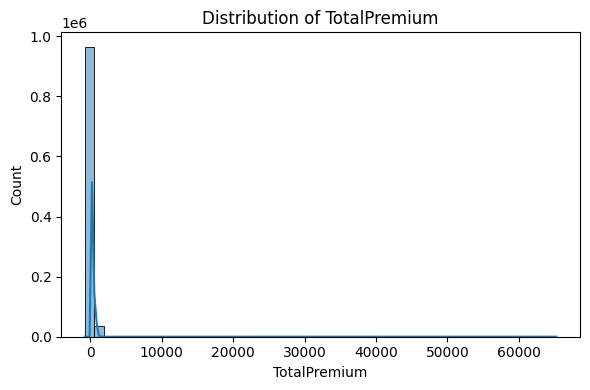

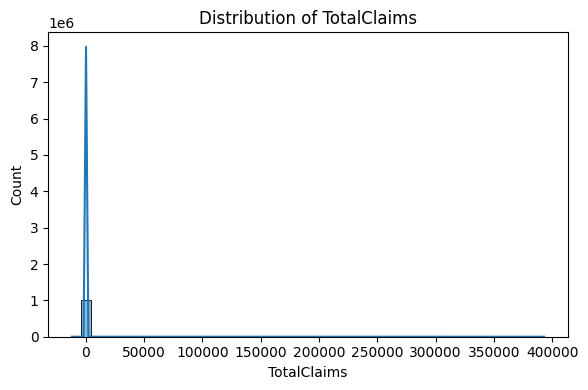

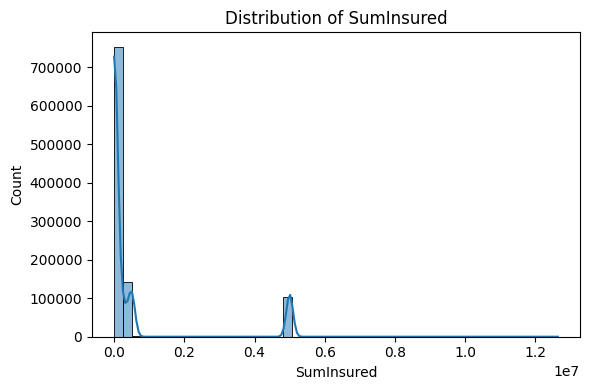

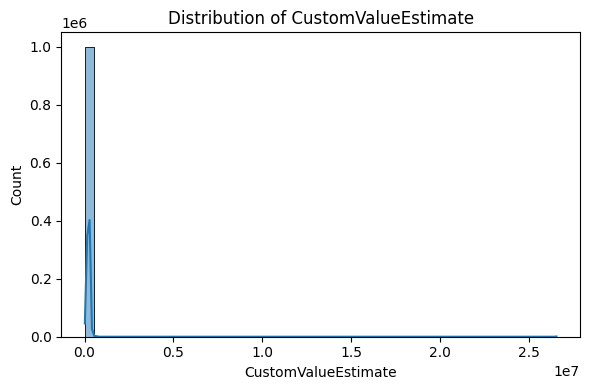

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


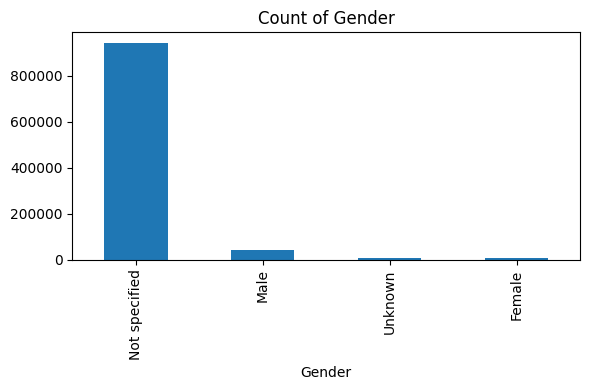

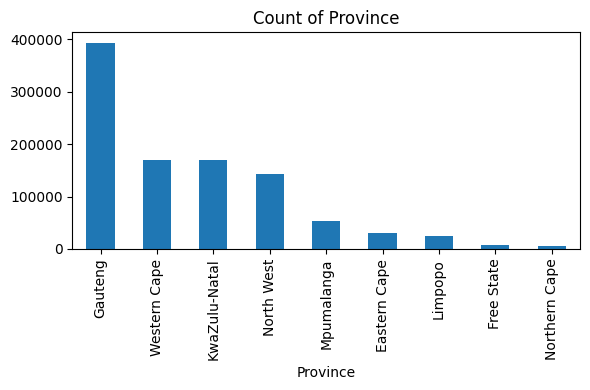

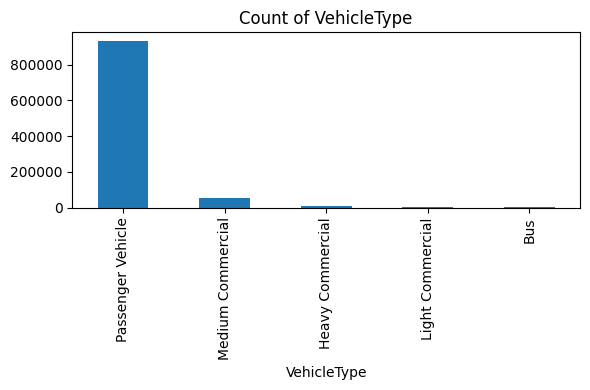

In [16]:
cat_cols = ['Gender', 'Province', 'VehicleType']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.tight_layout()
    plt.show()


In [17]:
print(df['Gender'].unique())


['Not specified', 'Male', 'Female', 'Unknown']
Categories (4, object): ['Female', 'Male', 'Not specified', 'Unknown']


In [23]:
# For the 'Gender' column specifically
df['Gender'] = df['Gender'].replace('unspecified', 'Unknown')

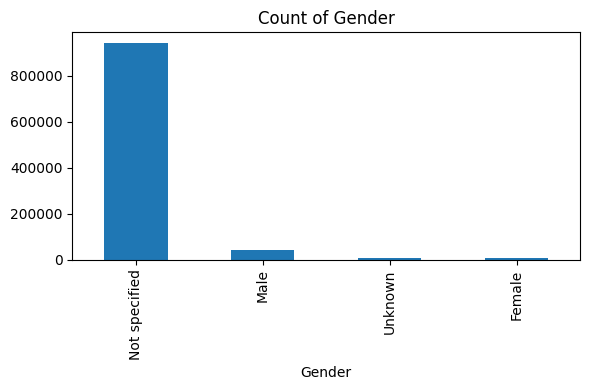

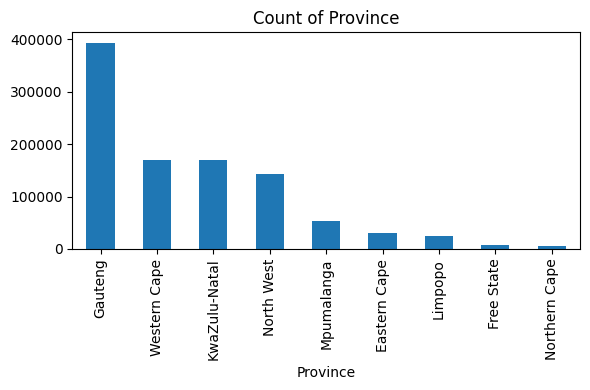

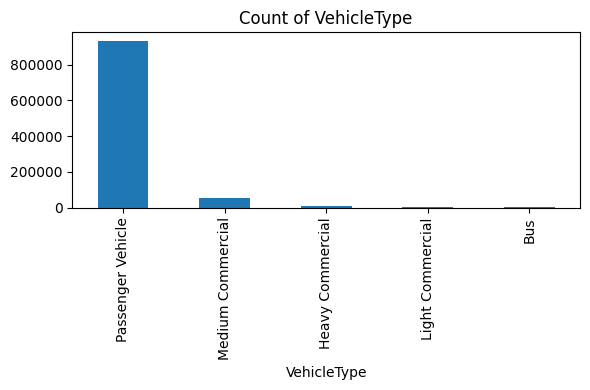

In [25]:
cat_cols = ['Gender', 'Province', 'VehicleType']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.tight_layout()
    plt.show()


C:\Users\fikre\AppData\Local\Temp\ipykernel_23676\1841206670.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Province')['LossRatio'].mean().sort_values()


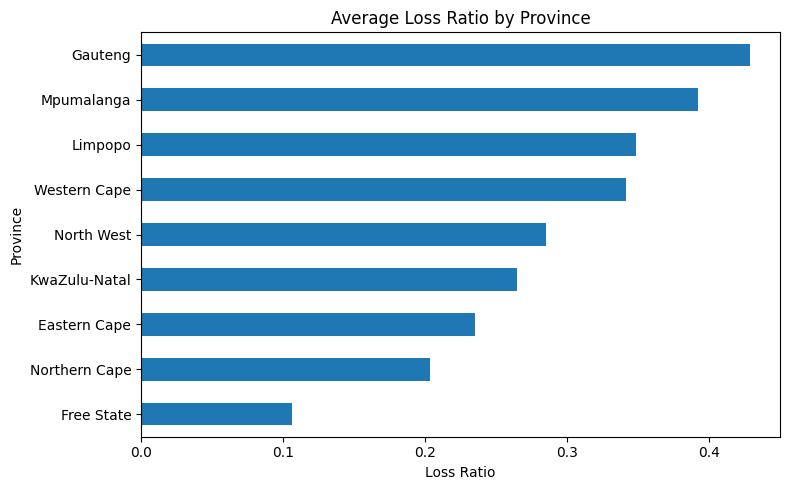

In [26]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([float('inf'), -float('inf')], None)

# Aggregate loss ratios
grouped = df.groupby('Province')['LossRatio'].mean().sort_values()
grouped.plot(kind='barh', title='Average Loss Ratio by Province', figsize=(8, 5))
plt.xlabel("Loss Ratio")
plt.tight_layout()
plt.show()


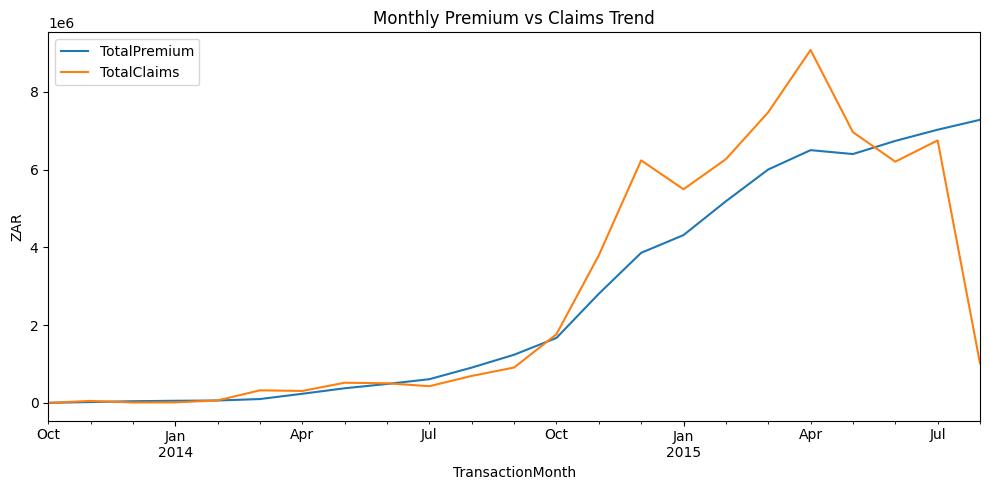

In [27]:
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalPremium', 'TotalClaims']].sum()
monthly.index = monthly.index.to_timestamp()

monthly.plot(figsize=(10, 5), title="Monthly Premium vs Claims Trend")
plt.ylabel("ZAR")
plt.tight_layout()
plt.show()


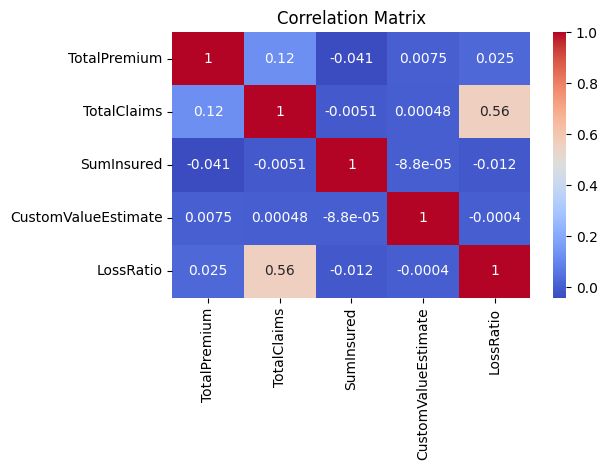

In [28]:
sns.heatmap(df[numerical_cols + ['LossRatio']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


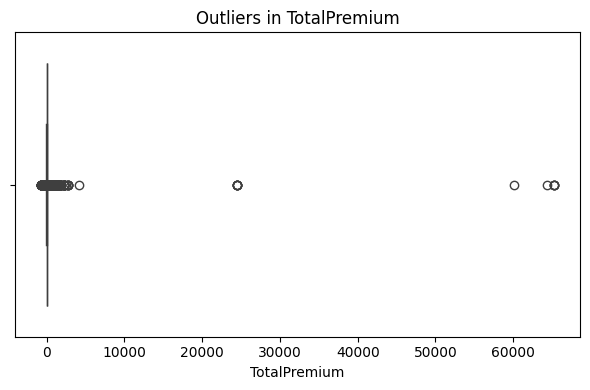

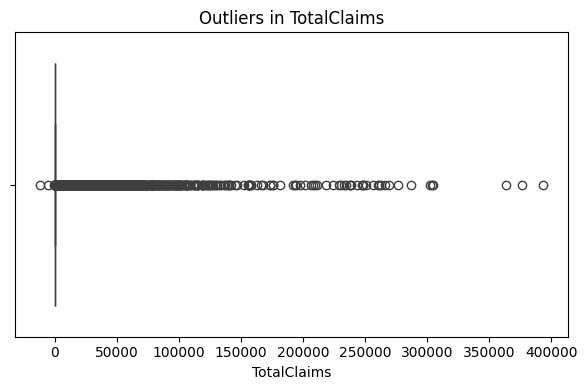

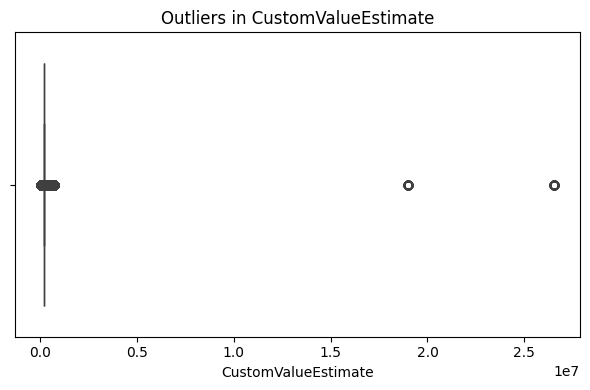

In [29]:
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.tight_layout()
    plt.show()
